<a href="https://colab.research.google.com/github/Mayankjain0807/Machine_learning_projects/blob/Machine-Learning-Projects/Netflix_Movies_and_TV_shows_clustering_detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** Netflix Movies and TV shows clustering

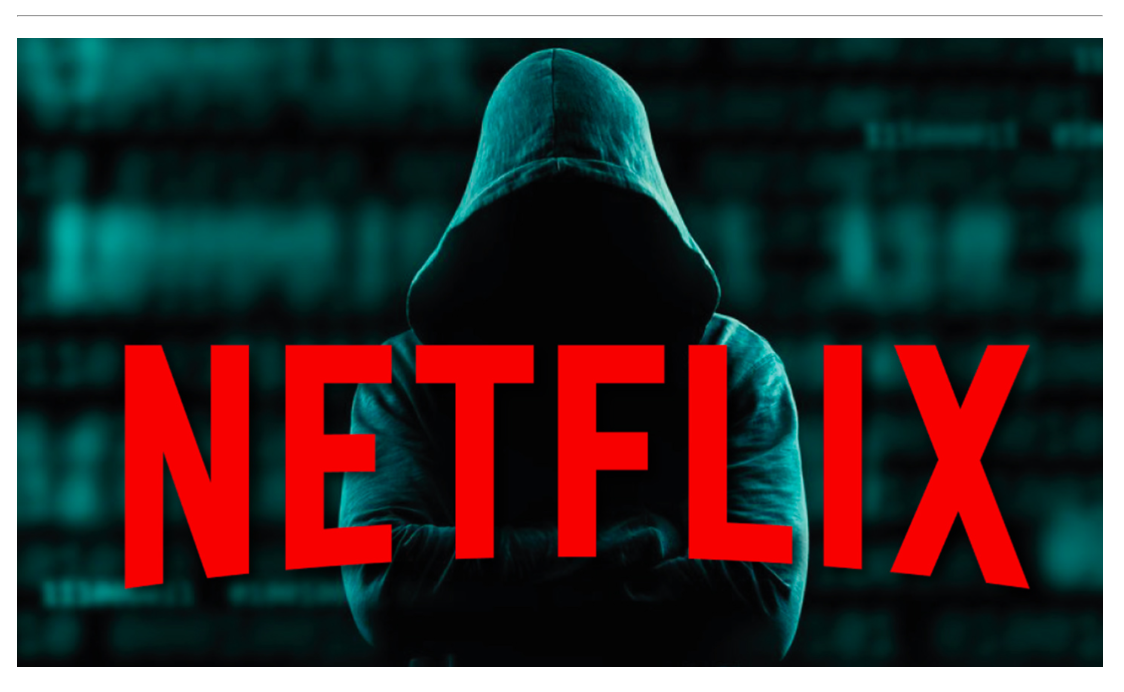

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual - Mayank Jain


# **Project Summary -**

#### This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset

# **GitHub Link -**

https://github.com/Mayankjain0807/Machine_learning_projects/blob/Machine-Learning-Projects/Netflix_Movies_and_TV_shows_clustering_detailed.ipynb

# **Problem Statement**

####**Netflix, one of the world's leading streaming platforms, aims to enhance user experience and content recommendation by organizing its vast library of movies and TV shows. The objective is to group similar movies and TV shows into clusters based on various features, such as genre, cast, user ratings, and release year. This clustering will enable Netflix to:**


**1.** Improve Content Recommendation: By categorizing content into clusters, Netflix can recommend movies and TV shows that are more likely to align with users' preferences, leading to higher user satisfaction.

**2.** Content Management: Clustering can help in efficiently managing the content library by identifying redundancy, highlighting gaps in content, and optimizing licensing decisions.

**3.** Personalization: Netflix can provide users with personalized recommendations and curated playlists based on their preferred content clusters.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import io
import warnings
warnings.filterwarnings('ignore')
import regex as re

from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt


### Dataset Loading

In [ ]:
# Load dataset

from google.colab import files
content = files.upload()

In [ ]:
data = pd.read_csv(io.BytesIO(content['NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv']))

### Dataset First View

In [ ]:
data.head()

### Dataset Rows & Columns count

In [ ]:
# Shape of our dataset
print("The shape of our dataset is :",data.shape)

print("\n")
print("---"*12)


### Dataset Information

In [ ]:
# overview of dataset

print(data.info())

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

data[data.duplicated()]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

data.isnull().sum()

In [ ]:
# Percentage of null values
round((data.isnull().sum()/len(data))*100,2)

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(9,6))
sns.heatmap(data.isnull(),cmap="YlGnBu",cbar={'label': 'Missing Data'})

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

In [ ]:
# Dataset Describe
data.describe()

### Variables Description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for x in data.columns:
  print("No. of unique values in ",x,"is",data[x].nunique())

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Make a copy of our dataset

df = data.copy()

In [ ]:
# all null dataset columns
col = df.loc[:,['director','cast','rating', 'date_added', 'country']]
col.columns

In [ ]:
# lets drop the null values in other 3 column i.e director, cast and rating
for x in col.columns:
  df.fillna({x: ''}, inplace = True)

In [ ]:
# Percentage after handling null values
round((df.isnull().sum()/len(df))*100,2)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df.head()

### **1- Netflix content**

In [ ]:
# find the type of content in amazon dataset
plt.style.use('dark_background')
plt.figure(figsize=(6,5))
df['type'].value_counts().plot(kind='pie', autopct='%1.0f%%',wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.1,'antialiased': True},colors=['steelblue', 'brown'],explode = (0.02,0.02))
plt.title("Netflix content")

### **2-Title**

In [ ]:
df.title.nunique()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
text = ' '.join(df.title.apply(lambda x: "".join(x)))

#stopwords list
stopwords = set(STOPWORDS)

# Wordcloud image of title column
wordcloud = WordCloud(height= 800, width = 1500,stopwords = stopwords,  background_color="black", colormap= 'viridis').generate(text)
plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Title')
plt.show()

There are some words like **LOVE, Christmas, Man, World** which are more frequently repeated in the Title.

### **3-RATING**

In [ ]:
# Netflix Rating
# Dark Background and figure size
# plt.style.use('dark_background')
plt.figure(figsize = (8,4))
sns.countplot(x =df.rating, data = df, order = df['rating'].value_counts().index[:20])
plt.title ("Netflix Rating")


### More than 2500 adult movies and TV shows are available in Netflix with TV-MA(Mature audience only) rating
### Around 2000 movies and TV shows are available in Netflix with TV-14 (Above 14 years audience) rating

In [ ]:
#Rating acccording to Movies and TV shows
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x= 'rating', hue= 'type', palette="husl", order = df['rating'].value_counts().index[:13])
plt.title ("Rating acccording to Movies and TV shows")
plt.xlabel('Rating')

### Movies are highly rated than TV-shows

### **4-  Director**

In [ ]:
director_df= df[df['director']!= '']
plt.figure(figsize = (7,4))
sns.countplot(x =director_df.director, data = director_df, order = data['director'].value_counts().index[:10])
plt.title ("Top 10 Director in movies and TV shows")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
x =director_df.director.value_counts()[:10]
x

In [ ]:
df.head(1)

### **5- Cast**

In [ ]:
# Extract all the actors from the cast column.
x = df['cast'].loc[:]
a = []
for i in x:
  for y in i.split(","):
    # print("".join(y))
    a.append(y)
print(a)

In [ ]:
# Convert the list into Dataframe
cast_name = pd.DataFrame(a)
cast_name.columns = ['actor']
cast_name

In [ ]:
# Plot a graph of top 10 actors who played a role in many movies or tv shows on Netflix.

plt.figure(figsize = (7,4))
cast_name[cast_name['actor'] != ''].value_counts().head(10).plot(kind = 'bar')
plt.title('Actors acted in no. of movies and TV shows')

### Anupam kher was the actor who acted in so many films and tv shows

### **6- Country**

In [ ]:
# Group by the country and the count the types of movies
x = pd.DataFrame(df.groupby(df['country'])['type'].count().drop('').sort_values(ascending = False))
x.rename(columns = {'type' :'Count'}, inplace = True)
x

In [ ]:
# plot a graph country vs production
plt.figure(figsize = (7,4))
sns.countplot(x =df.country, data = df, hue= 'type', order = df['country'].value_counts().drop('').index[:10])
plt.title ("Top 10 Country with Movie and TV show production")
plt.xticks(rotation = 90)
plt.show()

### US was the country who produce so many Movies over TV shows followed by INDIA.

### **7- Release Year**

In [ ]:
# Group by the country and the count the types of movies
year_df = pd.DataFrame(df.groupby(df['release_year'])['type'].count().sort_values(ascending = False))
year_df.head(15)

In [ ]:
# plot a graph of Movies and TV shows release in each year
plt.figure(figsize = (12,7))
sns.countplot(x = df.release_year, data = df, order = df['release_year'].value_counts().index[:15])
plt.title ("Total Movies and TV shows release in each year")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import plotly.graph_objs as go

content = [go.Bar(
   x = year_df.index,
   y = year_df.type
)]
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data= content, layout = layout)
fig.show(renderer='colab')

### **8- DURATION**

In [ ]:
# Convert the string column into integer column, name duration
df['duration'] = df['duration'].map(lambda x: ''.join(list((x.split(" "))[0]))).astype(int)

In [ ]:
# Average Movie duration on netflix
x = df[df['type'] == 'Movie'].loc[:,['title','duration']]
# sns.set(style="whitegrid")
sns.kdeplot(data=x['duration'],shade=True)
plt.title("Average Movie duration")

####Average Movie duration is nearly 90 minutes or 1.30 hour

In [ ]:
# Average Tv Shows on netflix
y = df[df['type'] == 'TV Show'].loc[:,['title','duration']]
# sns.set(style="whitegrid")
sns.kdeplot(data=y['duration'],shade=True)
plt.title("Average Season in TV Show")
plt.xlabel("season")

#### Average TV Show with 1 to 2 season long

#### **Top 5 Longest Duration Movie**

In [ ]:
# Longest 5 Movie on Netflix
plt.figure(figsize=(12,5))
# plt.style.use('dark_background')
new_style = {'grid': False}
sns.barplot(x='title' , y = 'duration',width= 0.5, data = x.sort_values(by= ['duration'],ascending = False)[:5])
plt.title ("TOP 5 Long duration movie on Netflix")
plt.ylabel("Duration")
plt.xlabel("Movie")


In [ ]:
# Longest 5 Movie on Netflix in india
india = df[(df['type'] == 'Movie') & (df['country'] == 'India')].loc[:,['title','duration']]
plt.figure(figsize=(12,5))
# plt.style.use('dark_background')
new_style = {'grid': False}
sns.barplot(x='title' , y = 'duration',width= 0.5, data = india.sort_values(by= ['duration'],ascending = False)[:5])
plt.title ("TOP 5 India's Long duration movie on Netflix")
plt.ylabel("Duration")
plt.xlabel("Movie")

#### **Top 5 TV Shows with Most Season**

In [ ]:
# Longest TV show on Netflix
plt.figure(figsize=(10,5))
# plt.style.use('dark_background')
new_style = {'grid': False}
sns.barplot(x='title' , y = 'duration', width= 0.5, data = y.sort_values(by= ['duration'],ascending = False)[:5])
plt.title ("TOP 5 TV Shows with most season on Netflix")
plt.ylabel("Season")
plt.xlabel("TV Show")

In [ ]:
# Longest 5 TV Show with most season in india on Netflix
season = df[(df['type'] == 'TV Show') & (df['country'] == 'India')].loc[:,['title','duration']]
plt.figure(figsize=(12,5))
# plt.style.use('dark_background')
new_style = {'grid': False}
sns.barplot(x='title' , y = 'duration', width= 0.5, data = season.sort_values(by= ['duration'],ascending = False)[:5])
plt.title ("TOP 5 India's TV show with most season in india on Netflix")
plt.ylabel("Season")
plt.xlabel("TV Show")

### **9- LISTED_IN**

In [ ]:
# Extraxt different genres from the columns and count them
x = df['listed_in'].loc[:]
genre = []
for i in x:
  for y in i.split(", "):
    genre.append(y)
print(genre)

import collections
gene = collections.Counter(genre)
print(gene)

In [ ]:
# convert list into dataframe
genre_df = pd.DataFrame(genre)
genre_df.columns = ['Genre']

# Plot a graph of top 10 actors who played a role in many movies or tv shows on Netflix.
plt.figure(figsize = (12,6))
genre_df.value_counts().plot(kind = 'bar')
plt.title('Different Genres')

### **10- DESCRIPTION**

In [ ]:
# Create a def function for description

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
def words_in_data(choice, column_category, column_name):
  words_df = df[[column_name, column_category]]
  words_df = words_df[words_df[column_category] == choice]
  text = ' '.join(words_df[column_name].apply(lambda x: "".join(x)))
  #stopwords list
  stopwords = set(STOPWORDS)
  # Wordcloud image of title column
  wordcloud = WordCloud(height= 800, width = 1500,stopwords = stopwords,  background_color="black", colormap= 'viridis').generate(text)
  plt.figure(figsize=(11, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Words in {choice} {column_name}')
  plt.show()



In [ ]:
# Word cloud image for TV show description
words_in_data('TV Show', 'type', 'description')

In [ ]:
# Word cloud image for Movie description
words_in_data('Movie', 'type', 'description')

### **10- Date added**

In [ ]:
# Extract month from the date_added column
df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

In [ ]:
# Plotting the Countplot
plt.figure(figsize = (12,7))
sns.countplot(x = df.month, data = df, order = df['month'].value_counts().index[:12])
plt.title ("Month wise content release")
plt.xticks(rotation = 90)
plt.show()

## **5- Countrywise Content Information data vizualization**

#### **1-Country vs content type**

In [ ]:
dff = df.copy()

In [ ]:
# To make a new column, explode the values with the columns and group  by the title and type.
dff['country_list'] = dff.apply(lambda x: (x['country'].split(", ")),axis=1)
group = dff.explode('country_list').reset_index(drop = True)
group = group.groupby(['country_list','type']).agg({'title':'count'}).reset_index()

# To get the distinct country name in to the list
c = []
for i in dff.country:
  for y in i.split(", "):
    c.append(y)
import collections
count = collections.Counter(c)
remove_space = count.pop('')

# Final run the loop to iterate the countries and match with the group column and give the output according to the country.
for i in count.keys():
  group[group['country_list'] == i].sort_values("title",ascending=False).plot.bar(x = "type", y="title", width = 0.4, color="slateblue", rot=45, figsize=(6,4))
  plt.title(f"{i}")



#### **2-Country vs Rating**

In [ ]:
# To make a new column, explode the values with the columns and group  by the title and type.
dff = df.copy()
dff['country_list'] = dff.apply(lambda x: (x['country'].split(", ")),axis=1)
group = dff.explode('country_list').reset_index(drop = True)
rat_ing = group.groupby(['country_list','rating']).agg({'title':'count'}).reset_index()

# To get the distinct country name in to the list
c = []
for i in dff.country:
  for y in i.split(", "):
    c.append(y)
import collections
count = collections.Counter(c)
remove_space = count.pop('')

# Final run the loop to iterate the countries and match with the group column and give the output according to the country.
for i in count.keys():
  rat_ing[rat_ing['country_list'] == i].sort_values("title",ascending=False).plot.bar(x = "rating", y="title", width = 0.4, color="slateblue", rot=45, figsize=(4,4))
  plt.title(f"{i}")

#### **3-Country vs Genres**

In [ ]:
# To make a new column, explode the values with the columns and group  by the title and type.
dff = df.copy()
dff['genre_list'] = dff.apply(lambda x: (x['listed_in'].split(", ")),axis=1)
dff = dff.explode('genre_list').reset_index(drop = True)
dff['country_list'] = dff.apply(lambda x: (x['country'].split(", ")),axis=1)
group = dff.explode('country_list').reset_index(drop = True)
group = group.groupby(['country_list','genre_list']).agg({'title':'count'}).reset_index()

# To get the distinct country name in to the list
c = []
for i in dff.country:
  for y in i.split(", "):
    c.append(y)
import collections
count = collections.Counter(c)
remove_space = count.pop('')

# Final run the loop to iterate the countries and match with the group column and give the output according to the country.
for i in count.keys():
  group[group['country_list'] == i].sort_values("title",ascending=False).plot.bar(x = "genre_list", y="title", width = 0.4, color="slateblue", rot=90, figsize=(8,5))
  plt.title(f"{i}")

#### **4-Country vs Director**

In [ ]:
# Directors of top 5 production countries
for i in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']:
  words_in_data(i,'country', 'director')

#### **5-Country vs Cast**

In [ ]:
# Cast of top 5 production countries
for i in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']:
  words_in_data(i,'country', 'cast')

#### **6-Country vs Title**

In [ ]:
# Title of top 5 production countries
for i in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']:
  words_in_data(i,'country', 'title')

#### **7-Country vs Description**

In [ ]:
# Description of top 5 production countries
for i in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']:
  words_in_data(i,'country', 'description')

#### **8-Country vs Content Count Visualization by Geographic Map**

In [ ]:
#necessary imports for plotly and map
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

In [ ]:
# Create a plotly map for visualization
b = df.copy()
b['country_list'] = b.apply(lambda x: (x['country'].split(", ")),axis=1)
new_t = b.explode('country_list')
lst_2 = []
for index, row in new_t.iterrows():

  lst_2.append(row['country_list'])
# print(lst_2)
import collections
cntry_name = collections.Counter(lst_2)
remove_space = cntry_name.pop('')
# print(cntry_name)
country_df = pd.DataFrame(list(zip(cntry_name.keys(), cntry_name.values())), columns =['country', 'count'])

In [ ]:
# import json data

import json

world = json.load(open("world.geojson", 'r'))

In [ ]:
# make a dictionary with keys as a country name and values as a county code from the json data
world_id_map = {}
for feature in world['features']:
  feature['id'] = feature['properties']['ISO_A3']
  world_id_map[feature['properties']['NAME_LONG']] = feature['id']

In [ ]:
# There are some countries which are exception in  geojson country data.
exception = ['South Korea','Russia','Soviet Union','Malta','Cayman Islands','United States,','Liechtenstein','Cambodia,','West Germany'
,'Poland,','Samoa','Bermuda','United Kingdom,','East Germany']
for i in exception:
  name = country_df['country'] == i
  country_df = country_df[~name]

In [ ]:
# Merge json id with our dataset
country_df['id'] = country_df['country'].apply(lambda x: world_id_map[x])

In [ ]:
# Plot a geographic map

fig = px.choropleth(country_df, locations = 'id',
                    geojson = world,
                    color = 'count',
                    hover_name = 'country',
                    hover_data = ['count'])
fig.show()

## **6- Is Netflix has increasingly focusing on TV rather than movies in recent years.?**

In [ ]:
# Convert date added column into datetime column.

df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
import plotly.graph_objs as go

# Select a data acc. to "type" column
tv_show = df[df['type'] == 'TV Show']
movie = df[df['type'] == 'Movie']

# count movies per year
movie_count = movie.year_added.value_counts().reset_index().sort_values(by = 'index', ascending = False )
movie_count = movie_count.rename(columns = {'index' : 'year','year_added': 'count'})

# count tv shows per year
tv_count = tv_show.year_added.value_counts().reset_index().sort_values(by = 'index', ascending = False )
tv_count = tv_count.rename(columns = {'index' : 'year','year_added': 'count'})

# data for movie
data_1 = go.Scatter(
   x = movie_count['year'],
   y = movie_count['count'],
   name="Movie", marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

# data for tv show
data_2 = go.Scatter(
   x = tv_count['year'],
   y = tv_count['count'],
   name="TV Shows",
                     marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data=[data_1, data_2], layout = layout)
fig.show(renderer='colab')

#### **1- Percent wise content increase in Movies and TV shows from last 5 year**

###**Movie**

In [ ]:
# count of movies till 2015
till_2015 = movie_count[(movie_count.year <=2015)]['count'].sum()

# Movies count inbetween 2016 to 2020
till_2016_2020 = movie_count[(movie_count.year >2016) & (movie_count.year <=2020)]['count'].sum()

print ('The count of movies till 2015 is:', till_2015)
print ('The count of movies inbetween 2016 to 2020 is:', till_2016_2020)

In [ ]:
# Factors by which movies will grow  in last 5 year.
factor = round(till_2016_2020/till_2015,2)
print(f'Movies grow by {factor} times in the last 5 year i.e 2016 to 2020')


###**TV Shows**

In [ ]:
# count of tv_shows till 2015
tv_till_2015 = tv_count[(tv_count.year <=2015)]['count'].sum()

# TV_shows count inbetween 2016 to 2020
tv_till_2016_2020 = tv_count[(tv_count.year >2016) & (tv_count.year <=2020)]['count'].sum()

print ('The count of tv_shows till 2015 is:', till_2015)
print ('The count of tv_shows inbetween 2016 to 2020 is:', till_2016_2020)


In [ ]:
# Factors by which TV Shows will grow in last 5 year.

factor = round(tv_till_2016_2020/tv_till_2015,2)
print(f'TV Shows grow by {factor} times in the last 5 year i.e 2016 to 2020')

### **Overall, Movies content increased by 47.84 times from the last 5 year, on the other hand, TV Shows content incresed by 51 times from the last 5 year.**

### **TV Shows increased by more than 3 times as compare to Movies content from the last 5 years.**

In [ ]:
# Lets check, From what factors the content increased each year.

import plotly.graph_objs as go

# Movie count
new_movie = movie_count.sort_values(by = 'year', ascending = True)
new_movie = new_movie.reset_index(drop = True)

# TV Count
new_tv = tv_count.sort_values(by = 'year', ascending = True)
new_tv = new_tv.reset_index(drop = True)

# Append the value in a list by which factors of movie content increase over each year
movie_factor = []
count =  0
previous_row = 0
for index, row in new_movie.iterrows():
  current_row = row['count']
  diff = current_row/previous_row
  previous_row  = new_movie['count'][count]
  count += 1
  movie_factor.append(diff)

# Append the value in a list by which factors of tv_show content increase over each year
tv_factor = []
count =  0
previous_row = 0
for index, row in new_tv.iterrows():
  current_row = row['count']
  diff = current_row/previous_row
  previous_row  = new_tv['count'][count]
  count += 1
  tv_factor.append(diff)

# convert into dataframe
new_movie['movie_factor'] = pd.DataFrame(movie_factor)
new_tv['tv_factor'] = pd.DataFrame(tv_factor)

# data for movie
data_1 = go.Scatter(
   x = new_movie['year'],
   y = new_movie['movie_factor'],
   name="Movie", marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

# data for tv show
data_2 = go.Scatter(
   x = new_tv['year'],
   y = new_tv['tv_factor'],
   name="TV Shows",
                     marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(hovermode= 'closest', title = 'No. of times content increase in each year' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data= [data_1, data_2] , layout = layout)
fig.show(renderer='colab')

### **In 2011, Movies content increase 13 times from the last year.**
### **In 2016, TV Show content increase 6.6 times from the last year.**

### These are the 2 years in which the growth is maximum over the year.

## ***7. Feature Engineering & Data Pre-processing***

In [ ]:
# convert rating columns into proper format
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# Merge all columns in to single columns

df['text'] =  df['description'] + ' ' + df['listed_in'] + ' ' + df['cast'] + ' '+ df['director']+ ' ' + df['target_ages'] + ' ' + df['country']


#### Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Create a function for pre-processing the data and cleaned the data in terms of removing stop words, blank space, 2 word letters.

def cleaned_text(text):
  # Remove special characters and make it lower case
  text = re.sub(r'[^a-zA-ZÀ-ú\s]', '', text.lower())
  #Tokenization
  tokens=text.split()
  # Remove numbers
  tokens = [token for token in tokens if not token.isdigit()]
  # Remove punctuation
  tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
  # Remove extra whitespace
  tokens = [token.strip() for token in tokens]
  # Remove two letter words
  tokens = [token for token in tokens if len(token) > 2]
  # Join the tokens back into a single text
  cleaned_text = ' '.join(tokens)
  return cleaned_text

In [ ]:
# Create a new columns after cleaning our text and pass a function
df['new_text'] = [cleaned_text(text) for text in df.text]

In [ ]:
df.head()

In [ ]:
# set a title as a index and drop all columns except new_text columns
new_df = df.loc[:,['title', 'new_text']]
new_df.set_index('title', inplace = True)

##### **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()
new_df['new_text'] = new_df['new_text'].apply(lambda x: ([lemmatizer.lemmatize(word) for word in x]))
# print(lemma_words)
# Joining the words back into a single text
new_df['new_text'] = new_df['new_text'].apply(lambda x: ''.join(x))

In [ ]:
new_df.head()

##### **Vectorization**

In [ ]:
# instantiating and generating the count matrix
vectorizer = TfidfVectorizer(max_features = 20000)
vector = vectorizer.fit_transform(new_df['new_text'])


In [ ]:
vector.shape

#### **PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(vector.toarray())

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(8,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

80 percent of variance seen nearly 3500 to 4000 components, so we take 4000 components.

In [ ]:
# Set the components 3000 because 80% variance shows on that value so set the dimension upto 3000 components, it easy our process for making the cluster.

from sklearn.decomposition import PCA
transformer = PCA(n_components=4000)
transformer.fit(vector.toarray())
vector_transformed = transformer.transform(vector.toarray())
vector_transformed.shape

# **8- Model Implementation**

### **Clustering the Data.**

### **1.Silhoutte Score**

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(vector_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):
  k_values = range(4,n)
  silhouette_scores = []
  for n_clusters in k_values:
      km = KMeans(n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(vector_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(vector_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
      silhouette_scores.append(score)

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(vector_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data
      optimal_k = k_values[np.argmax(silhouette_scores)]

  print("Optimal Number of Clusters (k):", optimal_k)

In [ ]:
silhouette_score_analysis(12)


##### Optimal number of cluster is 8, so we formed 8 clusters in our dataset

## **2. Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
distortions = []
k_values = range(2,11)
for k in k_values:
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init=10, random_state=0)
    km = km.fit(vector_transformed)
    distortions.append(km.inertia_)

#Plot the graph for the sum of square distance values and Number of Clusters
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=8, init= 'k-means++', random_state=9)
kmeans.fit(vector_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(vector_transformed)

#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(vector_transformed[label == i , 0] , vector_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [ ]:
df.head()

## **Word Cloud of different cluster on different columns**

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(6, 4))
  plt.imshow(wordcloud, interpolation='bilinear')

  plt.axis("off")
  plt.title(f'Cluster {category_name}')
  plt.show()

##### **Description**

In [ ]:
for i in range(8):
  func_select_Category(i, 'description')

##### **Listed_in**

In [ ]:
for i in range(8):
  func_select_Category(i, 'listed_in')

##### **Cast**

In [ ]:
for i in range(8):
  func_select_Category(i, 'cast')

##### **Director**

In [ ]:
for i in range(8):
  func_select_Category(i, 'director')

##### **Country**

In [ ]:
for i in range(8):
  func_select_Category(i, 'country')

##### **Title**

In [ ]:
for i in range(8):
  func_select_Category(i, 'title')

#### **Cluster 0 - Dramas, Action & Adventure**

#### **Cluster 1 - Dramas, International movies, Comedies**

#### **Cluster 2 - Stand-Up Comedy**

#### **Cluster 3 -  TV, Shows, Crime TV Shows, International TV Shows, TV Dramas**

#### **Cluster 4 - Anime series, Internantional TV Shows**

#### **Cluster 5 - Kids, Children and Family movies**

#### **Cluster 6 - Documentaries**

#### **Cluster 7 -Dramas , International movies**

##**3- Dendogram**

In [ ]:
#import libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(vector_transformed,
                            method = 'ward',
                            metric = 'euclidean')

plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

# **9- Movie Recommendation**

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(new_df['new_text'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

pd.DataFrame(cosine_sim)


In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):

    recommended_movies = []
    lst = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    # print(top_10_indexes)

    # populating the list with the titles of the best 10 matching movies

    for i in top_10_indexes:

      recommended_movies.append(list(new_df.index)[i])
      # recommended = pd.DataFrame(lst, columns = ['recommended_movies'])
    new = pd.DataFrame(list(zip(recommended_movies, top_10_indexes)), columns = [' Recommended movies','Index'])

    return new

In [ ]:
recommendations("Indiana Jones and the Last Crusade")

In [ ]:
recommendations('Betaal')

In [ ]:
recommendations('Zindagi Na Milegi Dobara')

In [ ]:
recommendations('100 Things to do Before High School')

# **10-Conclusion**

1. In this project, we explore how different movie and TV shows on Netflix can be grouped together based on their features, such as genre, director, cast, and rating.
 * Here we are with some major findings like, Most of the netflix content
   release in United states. After the US, India is the 2nd country where lot of netflix content release.
 * If we see overall content then Movies content are huge in no. as compare to
   TV Shows. But from the last 5 years, the growth of TV Shows overlap the growth of movies.
 * Movies content increased by 47.84 times from the last 5 year, on the other hand, TV Shows content increased by 51 times from the last 5 year.
 * **2018** was the year where highest no. of content release over netflix
   platform.
 * The majority of the rated content on Netflix falls into the TV-MA(indicating
   that mature content is more popular on Netflix.) and TV-14 categories.
 * International movies, Comedies, Dramas are the major content on netflix
   platform.
 * Maximum number of content is released in the month of December and October.

2. Feature enginerring part where we applied textual data preprocessing which
   involves several steps like-:
 * Merging all important columns into one single column.
 * Lower Casing
 * Removing Punctuations
 * Removing Stopwords
 * Text Normalization (by Lematization)
 * Text Vectorization (we used tfidf)

3. After tfidf vectorisation, we used PCA which is dimensionality reduction technique, where we were able to capture 80% of variance in 4000 components.


4. Then in clustering part, we used several clustering techniques, including silhouette score, k-means clustering, and dendrogram.
After analyzing the results of our clustering analysis, we determined that 8 clusters was the optimal number of clusters


5. We also created different word plots to visualise the distribution of genres and words over different clusters.

6. Finally we created recommender system using cosine similarity on our tfidf matrix.

7. Then, we checked the working of our recommender system by passing different movie names to it, and it performed well on them.